The ELBO loss is defined as $ \text{ELBO} = \mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] - KL(q_\phi(z|x)\parallel p(z)) $.



## ELBO Computation for Array

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 10 samples
μ: [-0.02830462  0.46713185  0.29570296  0.15354592 -0.12403282  0.21692315
 -1.440879    0.7558599   0.52140963  0.9101704 ]
σ: [1.0307516  1.040761   0.9555709  0.96873623 0.9406982  0.95924085
 0.97657025 0.9393926  0.9911998  0.9975442 ]

🔹 Step 2: Compute KL(q||p) with p(z)=N(0,1)
KL Divergence: 2.085332

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z): [-0.9240745  -1.4863427   0.29032063 -0.4803881  -0.69959563 -0.68965137
 -0.4238391  -1.8074621  -2.9883218  -0.36047047]

🔹 Step 4: Compute ELBO = mean(log p(x|z)) - KL
ELBO: -3.0423145
ELBO Loss: 3.0423145


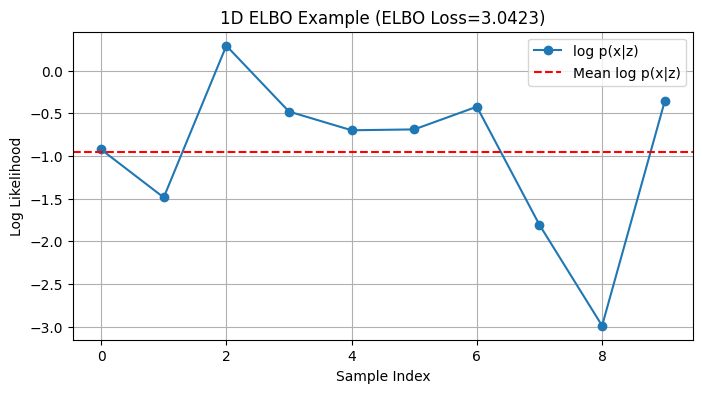

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

key = jax.random.PRNGKey(42)

print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 10 samples")

mu = jax.random.normal(key, shape=(10,))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(10,)) * 0.1  # small variance
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ:", mu)
print("σ:", std)

print("\n🔹 Step 2: Compute KL(q||p) with p(z)=N(0,1)")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(10,)) - 1.0
print("log p(x|z):", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO = mean(log p(x|z)) - KL")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Visualization ----
plt.figure(figsize=(8,4))
plt.plot(range(10), log_px_given_z, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_given_z), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"1D ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Sample Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()


## 2D ELBO Loss (2×2 Matrix)

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 2x2 matrix
μ matrix:
 [[ 1.6226422   2.0252647 ]
 [-0.43359444 -0.07861735]]
σ matrix:
 [[0.8850397 0.9032246]
 [1.0103302 0.9824778]]

🔹 Step 2: Compute KL divergence
KL Divergence: 3.4883015

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z) matrix:
 [[ 0.00401425 -1.9063373 ]
 [-1.7481723  -2.171367  ]]

🔹 Step 4: Compute ELBO
ELBO: -4.943767
ELBO Loss: 4.943767


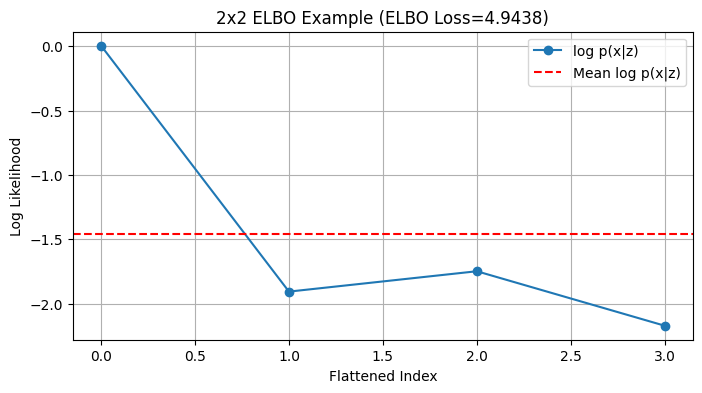

In [2]:
print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 2x2 matrix")

key = jax.random.PRNGKey(0)
mu = jax.random.normal(key, shape=(2,2))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(2,2)) * 0.1
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ matrix:\n", mu)
print("σ matrix:\n", std)

print("\n🔹 Step 2: Compute KL divergence")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(2,2)) - 1.0
print("log p(x|z) matrix:\n", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Flatten and visualize ----
log_px_flat = log_px_given_z.flatten()
plt.figure(figsize=(8,4))
plt.plot(range(len(log_px_flat)), log_px_flat, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_flat), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"2x2 ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()


## ELBO Loss for 3×3 Matrix

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 3x3 matrix
μ matrix:
 [[-1.446257    1.539381    0.38250625]
 [ 1.9707018  -0.5876674   0.20941563]
 [-1.2453285  -0.3013703  -0.80325365]]
σ matrix:
 [[0.90740985 1.0052546  0.9976234 ]
 [1.0154173  0.9848637  0.94737446]
 [0.96146184 0.97022223 1.0937667 ]]

🔹 Step 2: Compute KL divergence with p(z)=N(0,1)
KL Divergence: 5.606824

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z) matrix:
 [[-3.3783398  -2.7061667  -1.4913964 ]
 [-1.963126   -0.8097879   0.1139009 ]
 [-0.24740809 -3.125727    1.4414692 ]]

🔹 Step 4: Compute ELBO and ELBO Loss
ELBO: -6.9586663
ELBO Loss: 6.9586663


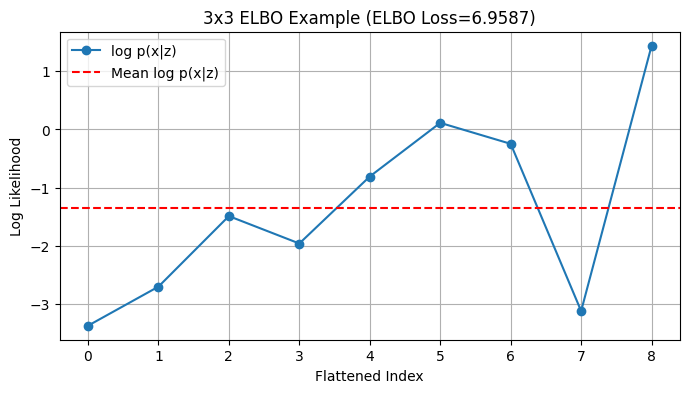

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

key = jax.random.PRNGKey(3)

print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 3x3 matrix")

mu = jax.random.normal(key, shape=(3,3))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(3,3)) * 0.1
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ matrix:\n", mu)
print("σ matrix:\n", std)

print("\n🔹 Step 2: Compute KL divergence with p(z)=N(0,1)")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(3,3)) - 1.0
print("log p(x|z) matrix:\n", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO and ELBO Loss")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Flatten and visualize ----
log_px_flat = log_px_given_z.flatten()
plt.figure(figsize=(8,4))
plt.plot(range(len(log_px_flat)), log_px_flat, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_flat), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"3x3 ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()


## ELBO Loss for 5×5 Matrix

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 5x5 matrix
μ matrix:
 [[-0.08437306  1.4110229   0.63048154 -1.3100973   1.3689315 ]
 [ 0.46135852 -2.123845   -1.6058723  -0.8372669  -0.16842504]
 [-3.1651952  -0.28706762  0.47498658 -0.13759778  1.006739  ]
 [-1.4031589  -0.88495743  0.9504355   0.43680725 -1.5774157 ]
 [ 2.3743632  -0.55763084 -0.09049941 -0.6494537   0.13936585]]
σ matrix:
 [[0.93333274 0.9636068  0.9410989  0.9696087  0.9433243 ]
 [0.9944245  1.004532   0.9973208  0.9520852  0.92909527]
 [0.8975791  1.0041193  0.95182264 1.0406839  0.9307544 ]
 [1.0050111  0.94520956 0.9116877  1.0412956  1.0383065 ]
 [0.92480606 1.0111725  0.97446865 0.9902912  1.0813833 ]]

🔹 Step 2: Compute KL divergence
KL Divergence: 19.122871

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z) matrix:
 [[-0.5847174   0.15038669 -1.6650095   0.24154043 -0.3919372 ]
 [-0.9735955  -2.0995617  -2.2137535   0.778864   -2.1967137 ]
 [-1.0378046  -2.2891898  -1.7878487  -2.6645136  -1.4211278 ]
 [-0.5

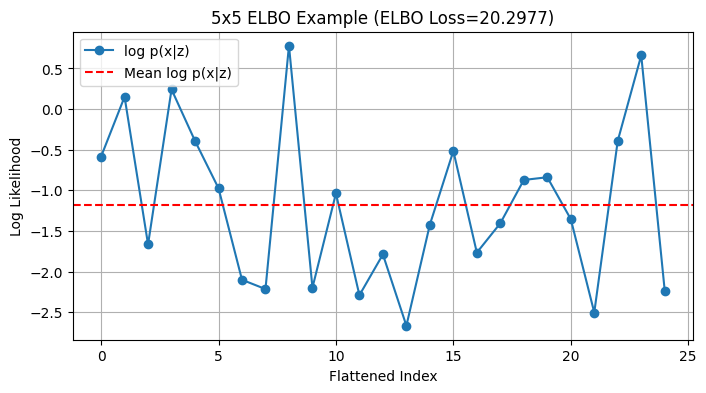

In [4]:
key = jax.random.PRNGKey(5)

print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 5x5 matrix")

mu = jax.random.normal(key, shape=(5,5))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(5,5)) * 0.1
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ matrix:\n", mu)
print("σ matrix:\n", std)

print("\n🔹 Step 2: Compute KL divergence")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(5,5)) - 1.0
print("log p(x|z) matrix:\n", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO and ELBO Loss")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Flatten and visualize ----
log_px_flat = log_px_given_z.flatten()
plt.figure(figsize=(8,4))
plt.plot(range(len(log_px_flat)), log_px_flat, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_flat), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"5x5 ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()


## 3D ELBO Loss (2×2×2 Tensor)

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 3D tensor 2x2x2
μ tensor:
 [[[-0.15443718  0.08470728]
  [-0.13598049 -0.15503626]]

 [[ 1.2666674   0.14829758]
  [ 2.1415603   1.0026742 ]]]
σ tensor:
 [[[0.9878781 1.0061624]
  [0.9625536 0.9545117]]

 [[1.0609354 1.0083472]
  [0.9385157 0.9291056]]]

🔹 Step 2: Compute KL divergence
KL Divergence: 3.6622448

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z) tensor:
 [[[-0.46806264 -1.723017  ]
  [-0.09274298 -1.9504526 ]]

 [[-2.937407    0.42284536]
  [-0.49142927 -1.2751236 ]]]

🔹 Step 4: Compute ELBO
ELBO: -4.7266684
ELBO Loss: 4.7266684


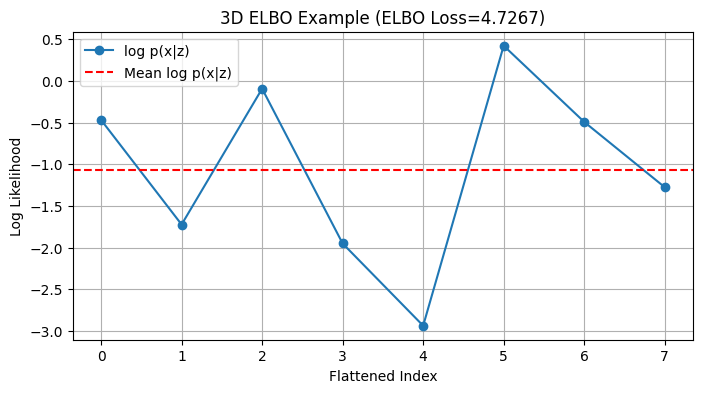

In [5]:
print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 3D tensor 2x2x2")

key = jax.random.PRNGKey(1)
mu = jax.random.normal(key, shape=(2,2,2))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(2,2,2)) * 0.1
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ tensor:\n", mu)
print("σ tensor:\n", std)

print("\n🔹 Step 2: Compute KL divergence")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(2,2,2)) - 1.0
print("log p(x|z) tensor:\n", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Flatten and visualize ----
log_px_flat = log_px_given_z.flatten()
plt.figure(figsize=(8,4))
plt.plot(range(len(log_px_flat)), log_px_flat, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_flat), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"3D ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()


## 4D ELBO Loss (2×2×2×2 Tensor)

🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 4D tensor 2x2x2x2
μ tensor:
 [[[[ 0.36057416  1.2849895 ]
   [-0.73873436  1.1830745 ]]

  [[-0.20641916 -0.8333566 ]
   [ 0.6233476  -0.88721675]]]


 [[[ 0.6922108   0.8711505 ]
   [ 1.4978964  -1.32336   ]]

  [[ 1.6417218  -0.46518597]
   [ 0.4113348   0.8994859 ]]]]
σ tensor:
 [[[[1.1403221  1.0010923 ]
   [0.9010963  1.0639286 ]]

  [[0.97332656 1.1038564 ]
   [1.0198743  0.9841739 ]]]


 [[[1.0695772  0.95906234]
   [0.92715275 1.0260998 ]]

  [[0.96414274 1.0007702 ]
   [0.970272   0.91142696]]]]

🔹 Step 2: Compute KL divergence
KL Divergence: 7.4488173

🔹 Step 3: Simulate log-likelihood log p(x|z)
log p(x|z) tensor:
 [[[[-0.6514322  -0.6339605 ]
   [-2.322813   -0.32521486]]

  [[-0.7685138  -1.4659672 ]
   [-0.20350558 -0.93700427]]]


 [[[ 0.25003064 -0.90006036]
   [-0.0426079   1.2404528 ]]

  [[-0.41516405 -1.2746501 ]
   [-1.5809013   0.56830275]]]]

🔹 Step 4: Compute ELBO
ELBO: -8.040256
ELBO Loss: 8.040256


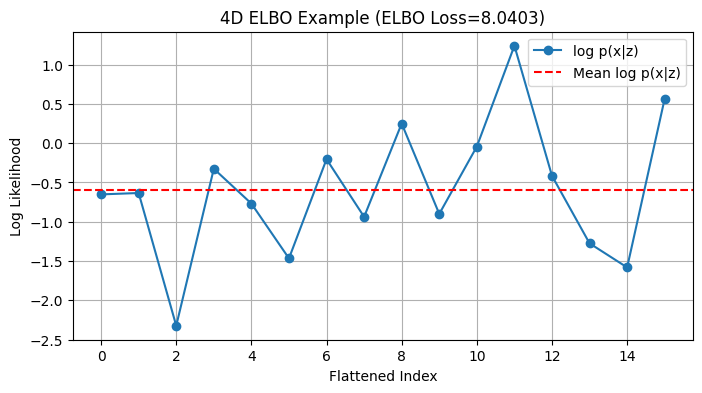

In [6]:
print("🔹 Step 1: Generate q(z|x) ~ N(μ, σ²) for 4D tensor 2x2x2x2")

key = jax.random.PRNGKey(2)
mu = jax.random.normal(key, shape=(2,2,2,2))
key, subkey = jax.random.split(key)
log_var = jax.random.normal(subkey, shape=(2,2,2,2)) * 0.1
var = jnp.exp(log_var)
std = jnp.sqrt(var)

print("μ tensor:\n", mu)
print("σ tensor:\n", std)

print("\n🔹 Step 2: Compute KL divergence")
kl_div = -0.5 * jnp.sum(1 + log_var - mu**2 - var)
print("KL Divergence:", kl_div)

print("\n🔹 Step 3: Simulate log-likelihood log p(x|z)")
log_px_given_z = jax.random.normal(key, shape=(2,2,2,2)) - 1.0
print("log p(x|z) tensor:\n", log_px_given_z)

print("\n🔹 Step 4: Compute ELBO")
elbo = jnp.mean(log_px_given_z) - kl_div
elbo_loss = -elbo
print("ELBO:", elbo)
print("ELBO Loss:", elbo_loss)

# ---- Flatten and visualize ----
log_px_flat = log_px_given_z.flatten()
plt.figure(figsize=(8,4))
plt.plot(range(len(log_px_flat)), log_px_flat, marker='o', label='log p(x|z)')
plt.axhline(jnp.mean(log_px_flat), color='r', linestyle='--', label='Mean log p(x|z)')
plt.title(f"4D ELBO Example (ELBO Loss={elbo_loss:.4f})")
plt.xlabel("Flattened Index")
plt.ylabel("Log Likelihood")
plt.legend()
plt.grid(True)
plt.show()
